In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/smartwatches.csv")
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [2]:
df.shape

(450, 16)

In [3]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Current Price', 'Original Price',
       'Discount Percentage', 'Rating', 'Number OF Ratings', 'Model Name',
       'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen',
       'Battery Life (Days)', 'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

1. UnNamed col is of no use
2. relation between discount perc, price and original price

In [4]:
#Remove UNNamed
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [5]:
df.isnull().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [6]:
df.shape

(450, 15)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(440, 15)

In [8]:
#splitting data
train_df = df.sample(frac=0.8, random_state=42)

test_df = df.drop(train_df.index)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


print(train_df.shape, test_df.shape)

(352, 15) (88, 15)


In [9]:
train_df.dtypes

Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [10]:
train_df.isnull().sum()

Brand                    0
Current Price            7
Original Price          57
Discount Percentage     57
Rating                   3
Number OF Ratings       48
Model Name              27
Dial Shape              91
Strap Color             91
Strap Material          53
Touchscreen             31
Battery Life (Days)     25
Bluetooth                5
Display Size            26
Weight                 147
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                352 non-null    object 
 1   Current Price        345 non-null    float64
 2   Original Price       295 non-null    float64
 3   Discount Percentage  295 non-null    float64
 4   Rating               349 non-null    float64
 5   Number OF Ratings    304 non-null    float64
 6   Model Name           325 non-null    object 
 7   Dial Shape           261 non-null    object 
 8   Strap Color          261 non-null    object 
 9   Strap Material       299 non-null    object 
 10  Touchscreen          321 non-null    object 
 11  Battery Life (Days)  327 non-null    float64
 12  Bluetooth            347 non-null    object 
 13  Display Size         326 non-null    object 
 14  Weight               205 non-null    object 
dtypes: float64(6), object(9)
memory usage: 4

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                88 non-null     object 
 1   Current Price        85 non-null     float64
 2   Original Price       72 non-null     float64
 3   Discount Percentage  72 non-null     float64
 4   Rating               85 non-null     float64
 5   Number OF Ratings    77 non-null     float64
 6   Model Name           82 non-null     object 
 7   Dial Shape           66 non-null     object 
 8   Strap Color          66 non-null     object 
 9   Strap Material       75 non-null     object 
 10  Touchscreen          82 non-null     object 
 11  Battery Life (Days)  81 non-null     float64
 12  Bluetooth            87 non-null     object 
 13  Display Size         84 non-null     object 
 14  Weight               49 non-null     object 
dtypes: float64(6), object(9)
memory usage: 10.

In [13]:
train_df.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     345.000000      295.000000           295.000000  349.000000   
mean    12226.628986    14163.593220            47.091312    4.013181   
std     16165.849708    15158.287437            24.243852    0.557084   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2199.000000     5999.000000            33.017817    3.900000   
50%      3999.000000     7990.000000            52.506563    4.100000   
75%     16999.000000    17999.000000            65.863413    4.300000   
max     89900.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         304.000000           327.000000  
mean        12253.371711            14.198012  
std         44607.446931             7.776580  
min             1.000000             0.750000  
25%            65.000000             8.000000  
50%           961.500000            17.500000  
75%          5978.500000            22.000000  
max        619130.000000            22.000000

In [ ]:
#initial eda should be done by pandas profiling

train_df.dtypes

Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [18]:
numerics = [feature for feature in train_df.columns if train_df[feature].dtype != "object" ]
numerics

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [19]:
categorical =  [feature for feature in train_df.columns if train_df[feature].dtype == "object" ]
categorical

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [20]:
train_df[numerics].corr()

Current Price  Original Price  Discount Percentage  \
Current Price             1.000000        0.970037            -0.590105   
Original Price            0.970037        1.000000            -0.461361   
Discount Percentage      -0.590105       -0.461361             1.000000   
Rating                    0.392064        0.312889            -0.219439   
Number OF Ratings        -0.143698       -0.125121             0.200445   
Battery Life (Days)       0.014984       -0.118164            -0.013755   

                       Rating  Number OF Ratings  Battery Life (Days)  
Current Price        0.392064          -0.143698             0.014984  
Original Price       0.312889          -0.125121            -0.118164  
Discount Percentage -0.219439           0.200445            -0.013755  
Rating               1.000000           0.069537            -0.081172  
Number OF Ratings    0.069537           1.000000             0.050199  
Battery Life (Days) -0.081172           0.050199             1.000000

In [23]:
train_df[numerics].skew()

Current Price          2.299597
Original Price         2.895660
Discount Percentage   -1.007935
Rating                -1.662509
Number OF Ratings      9.656400
Battery Life (Days)   -0.216196
dtype: float64

In [30]:
from ydata_profiling import ProfileReport
ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 20.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

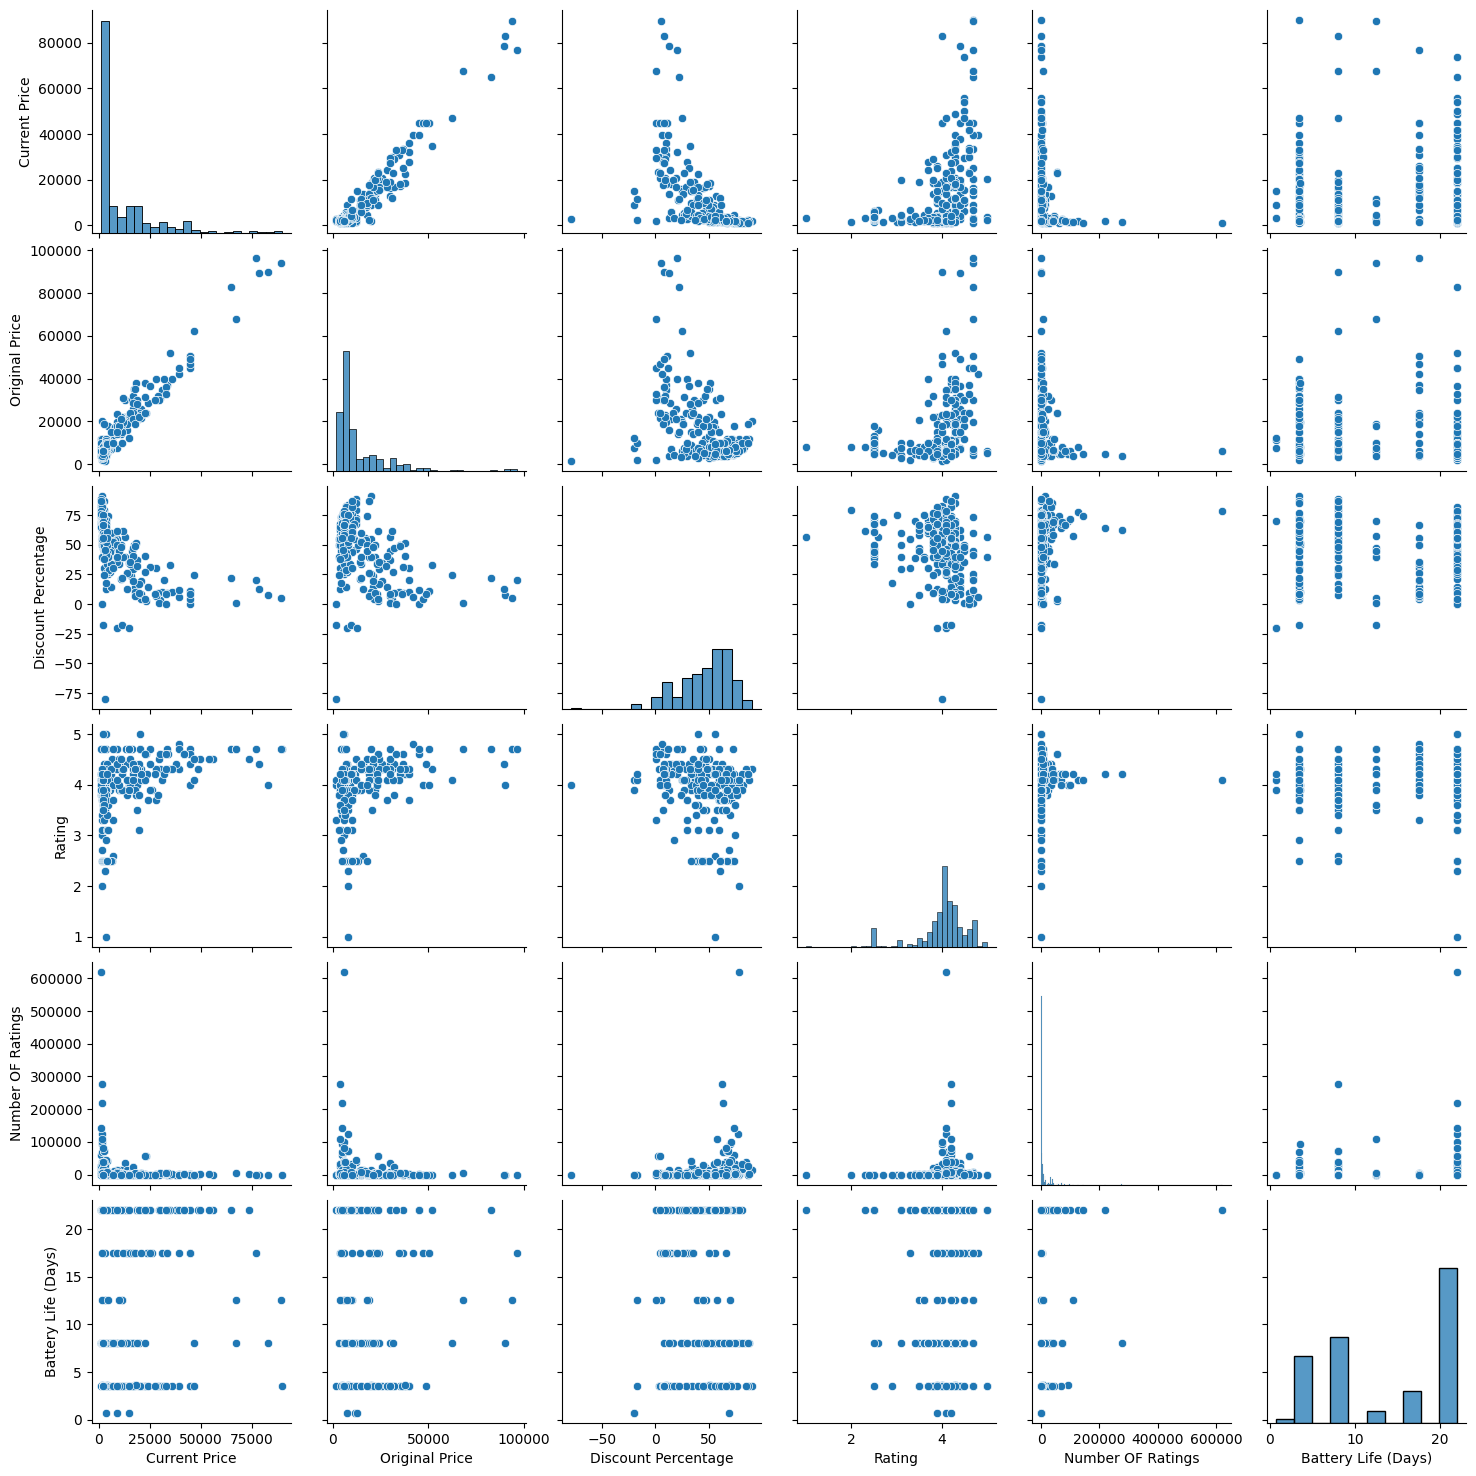

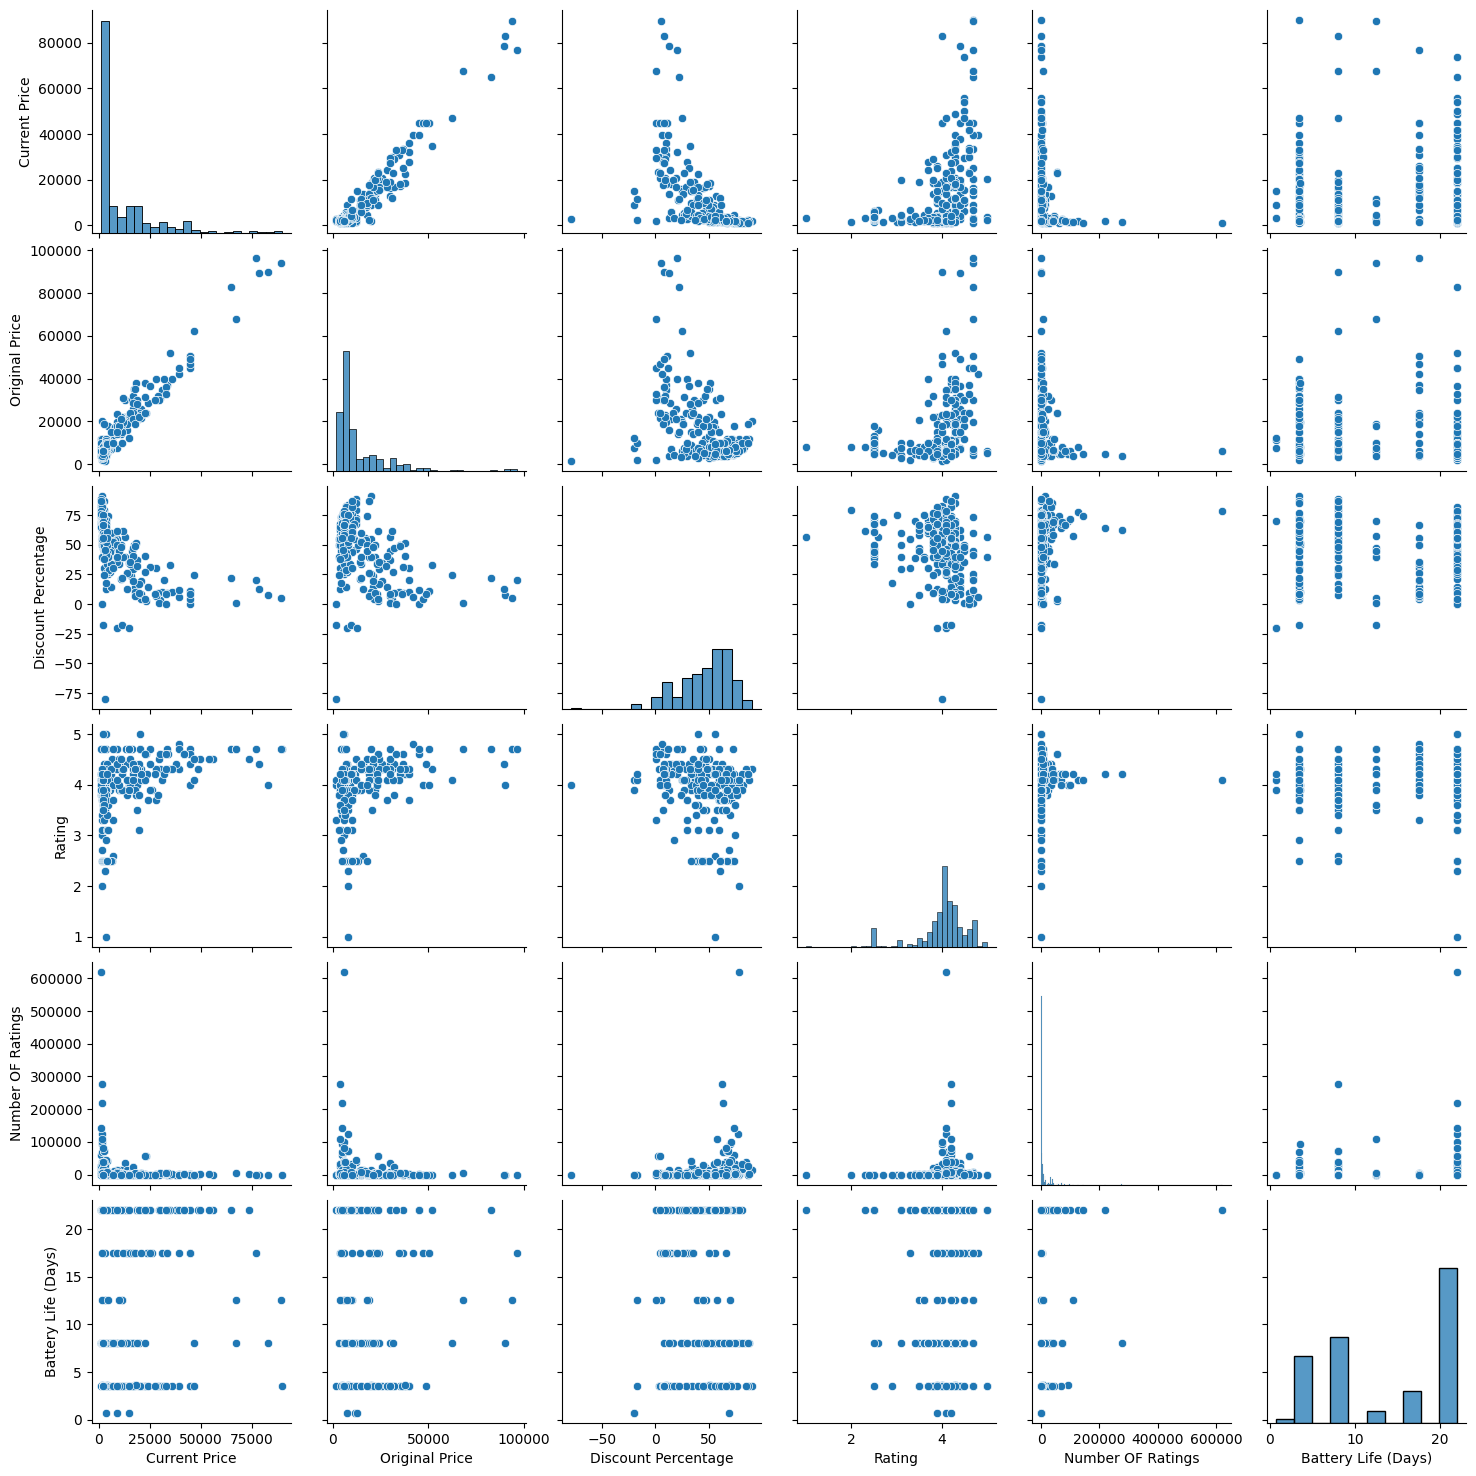

In [33]:
import seaborn as sns
%matplotlib inline

sns.pairplot(train_df)
